# Основы Python для аналитиков
## Семинар 4

## Задача 1. Постройте график, назовите график, сделайте именование оси x и оси y, сделайте выводы

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.1. Скачать данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/5298945/attachment/0bff2e29897ee28a9e482ff8499da7de.csv

In [170]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

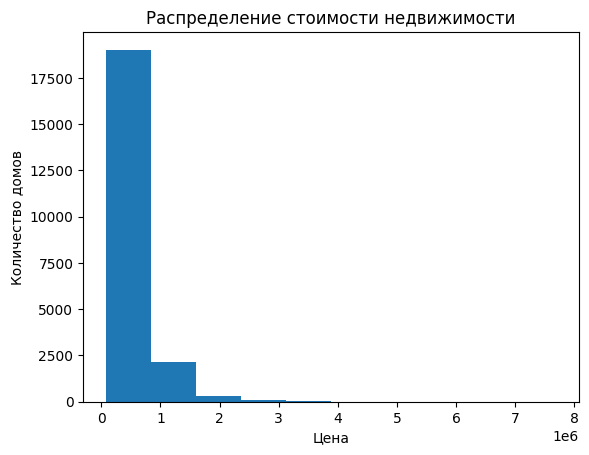

In [171]:
plt.hist(df['price'])
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество домов');

Чем дороже дом, тем меньше возможных вариантов. Обратная прямая зависимость

### 1.3 Изучите распределение квадратуры жилой

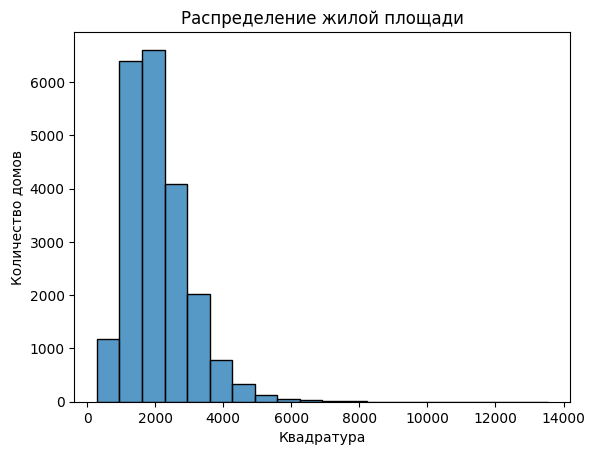

In [172]:
sns.histplot(df['sqft_living'], bins=20)
plt.title('Распределение жилой площади')
plt.xlabel('Квадратура')
plt.ylabel('Количество домов');

Больше всего домов с жилой площадью 1000-2500м2

### 1.4 Изучите распределение года постройки

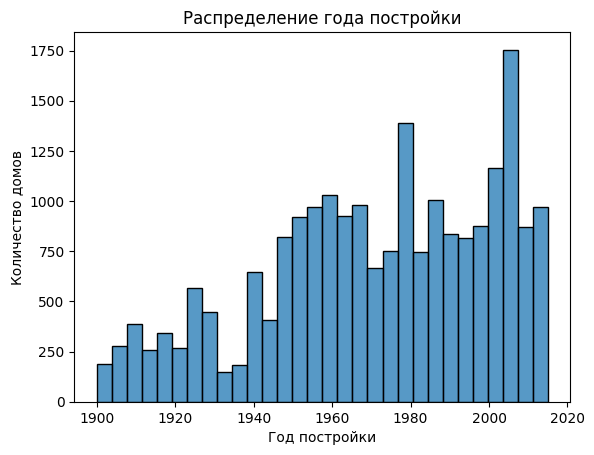

In [173]:
sns.histplot(df['yr_built'], bins=30)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов');

Старых домов меньше, чем новых

## Задача 2. Постройте график, сделайте выводы
### 2.1 Изучите распределение домов от наличия вида на набережную

In [174]:
data = df['waterfront'].value_counts()
data

waterfront
0    21450
1      163
Name: count, dtype: int64

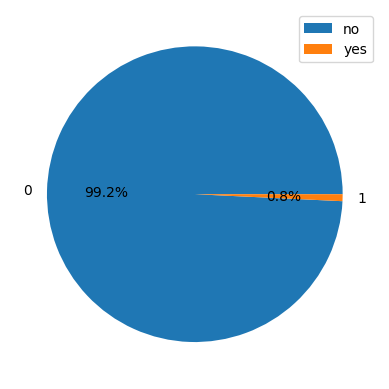

In [175]:
names = data.index
values = data.values
plt.pie(values, autopct='%.1f%%', labels=names)
plt.legend(['no', 'yes']);

Домов с видом на набережную меньше процента

### 2.2 Изучите распределение этажей домов

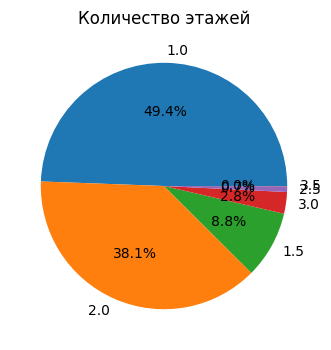

In [181]:
data = df['floors'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%', labels=data.index)
plt.title('Количество этажей');

Больше всего домов с 1 этажом

### 2.3 Изучите распределение состояния домов

In [178]:
data = df['condition'].value_counts()
data

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

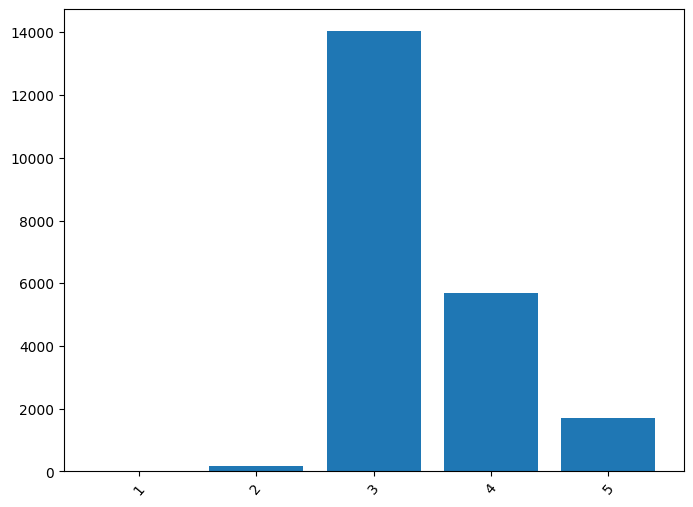

In [179]:
names = data.index
values = data.values
plt.figure(figsize=(8, 6))
plt.bar(names, values)
plt.xticks(rotation=50);

Больше всего средних по состоянию домов

## Задача 3. Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [182]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


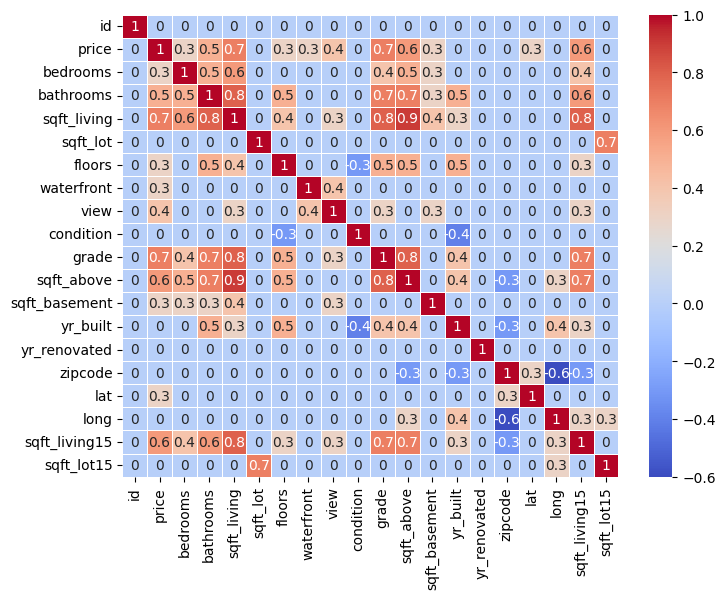

In [183]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

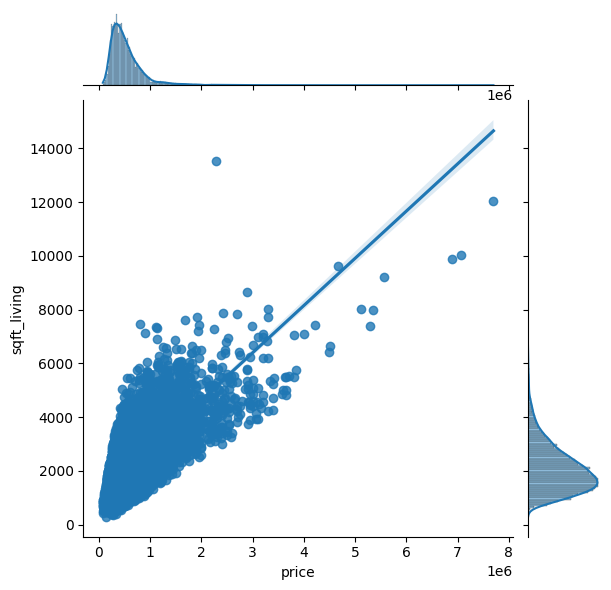

In [184]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

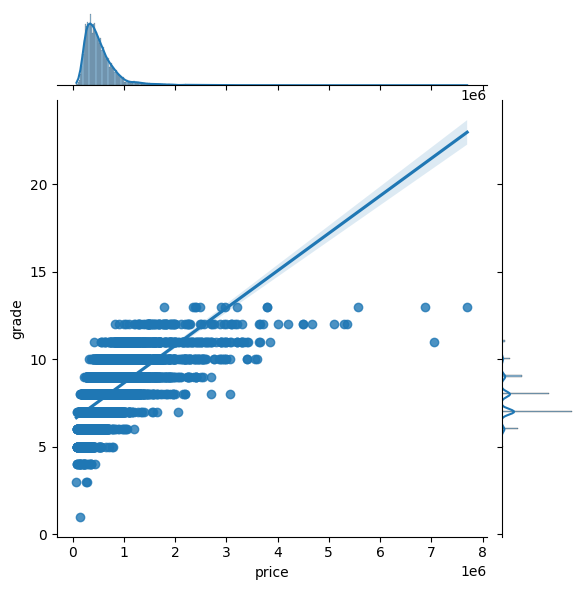

In [185]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

Чем выше качество конструкции и дизайна дома, тем выше его стоимость

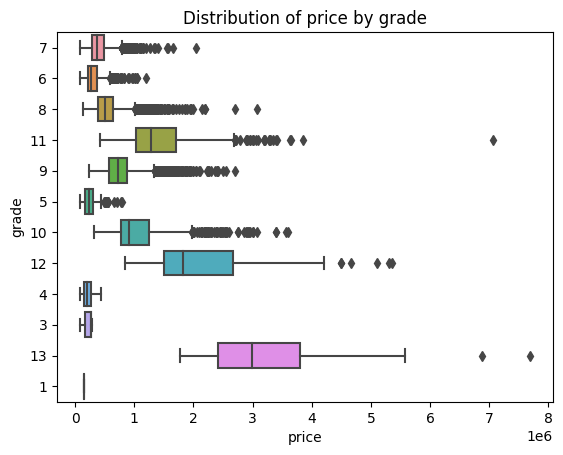

In [186]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Distribution of price by grade');

Наибольшую стоимость имеют дома с оценкой конструкции и дизайна 13

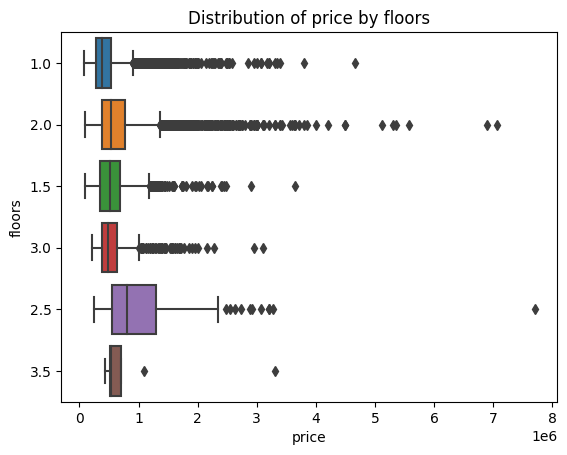

In [187]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('floors')
plt.title('Distribution of price by floors');

Наибольшую стоимость имеют дома с количеством этажей 2,5

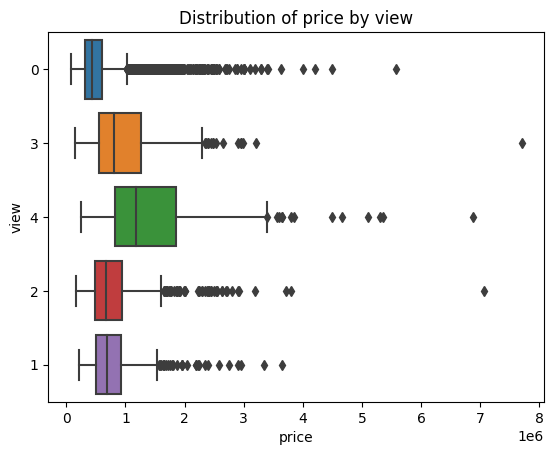

In [188]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('view')
plt.title('Distribution of price by view');

Наибольшую стоимость имеют дома с оценкой вида 4